In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

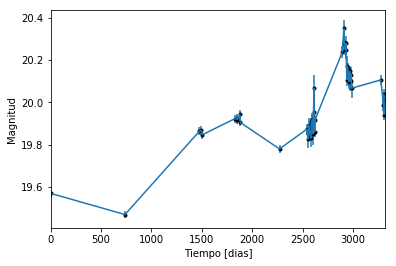

In [3]:
data = np.genfromtxt('LC_22611_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

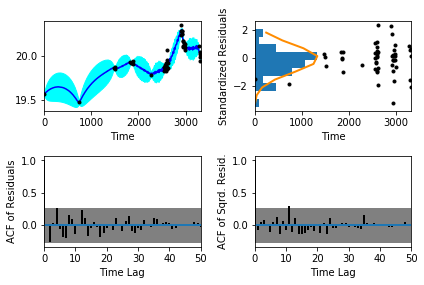

In [6]:
sample.assess_fit()

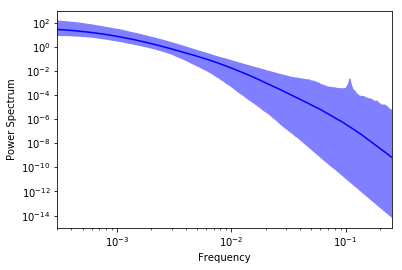

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0832446,'Medida del nivel de ruido')

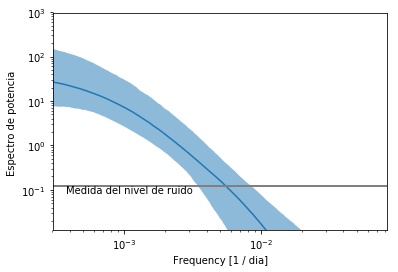

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

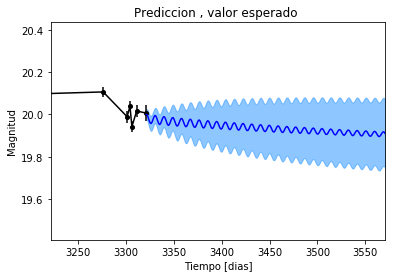

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

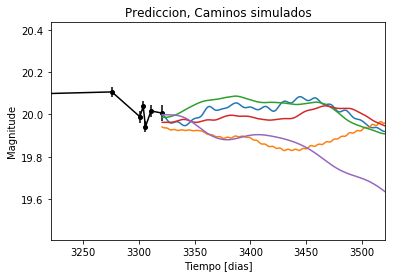

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


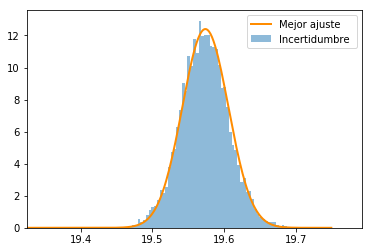

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

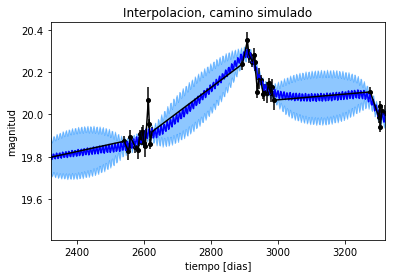

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

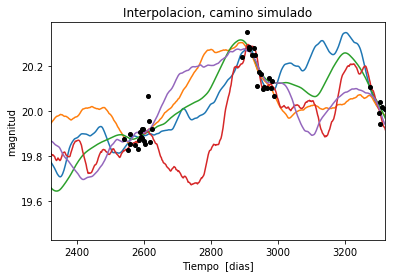

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 796.293714122
Median: 0.0127023712696
Standard deviation: 0.109995142397
68% credibility interval: [ 0.00107469  0.14192247]
95% credibility interval: [  3.79840795e-04   4.18209999e-01]
99% credibility interval: [  3.22752159e-04   4.87445558e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 750.568065707
Median: 0.00204180000151
Standard deviation: 0.038017327883
68% credibility interval: [ 0.00046035  0.01629087]
95% credibility interval: [ 0.00032397  0.11654526]
99% credibility interval: [ 0.00030412  0.2982321 ]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 785.095394431
Median: 0.0169655136594
Standard deviation: 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 653.594468922
Median: 91.7433070892
Standard deviation: 1.97827602418
68% credibility interval: [ 89.71505457  93.21230919]
95% credibility interval: [ 86.9630365  94.7969878]
99% credibility interval: [ 84.93585341  97.43454715]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 246.279237076
Median: 0.533044819
Standard deviation: 1.14672482902
68% credibility interval: [ 0.06705092  2.25107134]
95% credibility interval: [ 0.01914224  3.83941606]
99% credibility interval: [ 0.01110458  5.23467915]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 566.683745467
Median: 0.323761849143
Standard deviation: 1.96722659195
68% credibility interval: [ 0.02414581  2.07420085]
95% credibility interval: [  2.01480435e-03  

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3105.57530622
Median: 1.93530845544e-47
Standard deviation: 8.51819677587e+26
68% credibility interval: [  2.83462119e-84   1.37056482e-08]
95% credibility interval: [  2.89954347e-154   6.73157116e+001]
99% credibility interval: [  7.22098530e-183   7.95544890e+017]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3625.00700812
Median: 19.8148505484
Standard deviation: 0.125879802321
68% credibility interval: [ 19.70345957  19.92259396]
95% credibility interval: [ 19.55498248  20.05033843]
99% credibility interval: [ 19.38697955  20.16131635]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 361.296339096
Median: 0.00445620303126
Standard deviation: 0.115602244446
68% credibility interval: [ 0.          0.17391707]
95% credibility interval: [ 0.          0.41291763]
99% credibility interval: [ 0.       0.48447]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 361.296339096
Median: 0.00445620303126
Standard deviation: 0.115602244446
68% credibility interval: [ 0.          0.17391707]
95% credibility interval: [ 0.          0.41291763]
99% credibility interval: [ 0.       0.48447]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1156.58356659
Median: 0.0
Standard deviation: 0.000264461032972
68% credibility 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 653.594468922
Median: 91.7433070892
Standard deviation: 1.97827602418
68% credibility interval: [ 89.71505457  93.21230919]
95% credibility interval: [ 86.9630365  94.7969878]
99% credibility interval: [ 84.93585341  97.43454715]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2483.50100403
Median: 0.0561548432063
Standard deviation: 0.0761540132386
68% credibility interval: [ 0.03433767  0.1039054 ]
95% credibility interval: [ 0.02335218  0.2493227 ]
99% credibility interval: [ 0.01852595  0.48463542]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 755.179033253
Median: 1.24616569367
Standard deviation: 0.208515500581
68% credibility interval: [ 1.05984812  1.47491542]
95% credibility interval: [ 0.91206254  1.72917772]
99% credibility interval: [ 0.81833623  1.87123722]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1135.5386653
Median: 0.000169111050888
Standard deviation: 0.0069250170873
68% credibility interval: [  7.85357464e-06   1.63276474e-03]
95% credibility interval: [  4.39040964e-08   1.04067559e-02]
99% credibility interval: [  2.96396519e-22   4.66333929e-02]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 796.293714122
Median: (-0.0798113525276-1.20580461488j)
Standard deviation: 1.00261231655
68% credibility interval: [-0.89172516+0.j         -0.00675245-0.00195842j]
95% credibility interval: [ -2.62769092e+00+0.j          -2.38661010e-03-1.10416376j]
99% credibility interval: [ -3.06271077e+00+0.j          -2.02791162e-03-1.53403696j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 750.568065707
Median: (-0.0128290077697+0.0115893092985j)
Standard deviation: 0.764619924936
68% credibility interval: [-0.10235857+0.j -0.00289246+0.j]
95% credibility interval: [-0.73227547+0.70604745j -0.00203555+0.j        ]
99% credibility interval: [-1.87384752+0.613684j -0.00191082+0.j      ]
Posterior summary for parameter ar_roots 